In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.cluster import hierarchy #import dendrogram
import matplotlib.colors as colors
import matplotlib.patches as mpatches
from scipy.stats import chi2_contingency
import seaborn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
with open('../data/final_clustering.pkl', 'rb') as f:
    cdat = pickle.load(f)
sc = cdat['basis'][['StrTIL', 'count_l']].copy().dropna().astype(float)
sc['StrTIL'] = sc['StrTIL'].apply(lambda x: x/100)

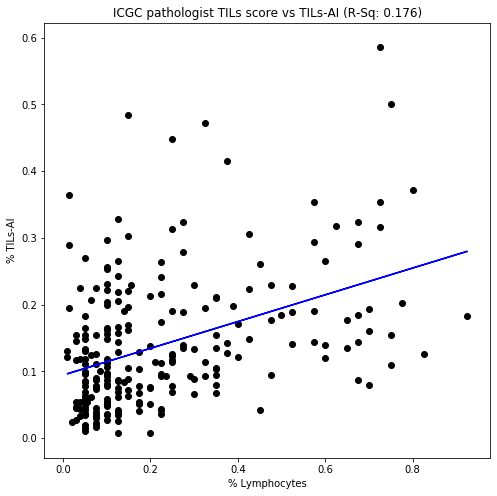

In [3]:
x = sc[['StrTIL']].values
y = sc[['count_l']].values
reg = LinearRegression()
reg.fit(x, y)
yhat = reg.predict(x)
r2 = r2_score(y, yhat)
#
fig = plt.figure(figsize=(8, 8))
fig.patch.set_facecolor('white')
plt.scatter(x, y, c='black')
plt.plot(x, yhat, c='blue')
# plt.text(.78, .26, 'R2: {:.3f}'.format(r2), c='blue', fontsize=12, rotation=reg.coef_[0][0] * 90)
plt.xlabel('% Lymphocytes')
plt.ylabel('% TILs-AI')
plt.title('ICGC pathologist TILs score vs TILs-AI (R-Sq: {:.3f})'.format(r2))
plt.savefig('../figures/fig_TILS_scatter.png', facecolor='w', format='png')
plt.show()

In [4]:
##:~